In [50]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
init_val = np.ones(N)

N_it = 1000000

for i in range(N_it):
    
    pick = np.random.randint(0, N, 2)
    if pick[0] == pick[1]:
        pick[0] = np.random.randint(0, N)

    else:
    
        sum = init_val[pick[0]] + init_val[pick[1]]

        first_val = np.random.randint(0, sum + 1)
        second_val = sum - first_val

        init_val[pick[0]] = first_val
        init_val[pick[1]] = second_val


Text(0, 0.5, 'Frequency')

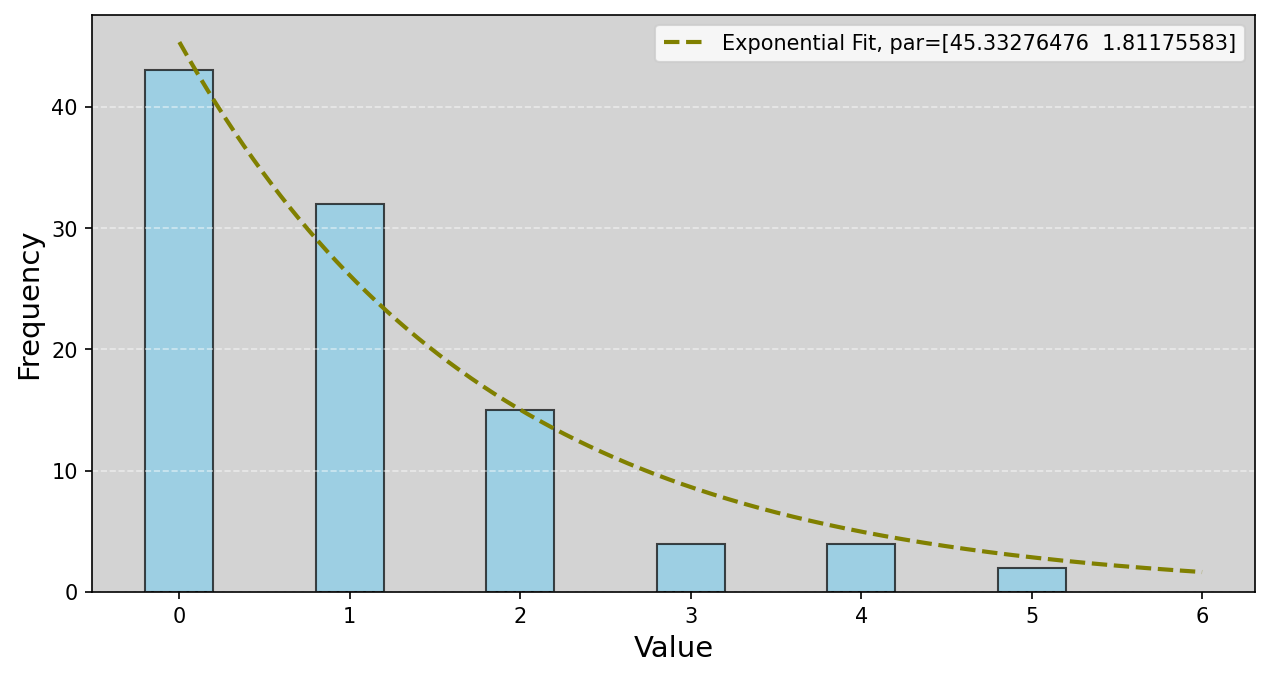

In [70]:
fig, ax = plt.subplots(dpi=150, figsize=(10,5))

vals, binedges, _ = plt.hist(init_val, bins=int(max(init_val)+1), range=(0, max(init_val)+1), histtype='bar', color='skyblue', alpha=0, edgecolor='black')

# Exponential fit
def exp(x, A, tau):
    return A * np.exp(-x/tau)


from scipy.optimize import curve_fit
popt_exp, pcov_exp = curve_fit(exp, binedges[:-1], vals, p0=(max(vals), 2))

x_fit = np.linspace(0, max(init_val+1), 1000)
y_fit_exp = exp(x_fit, *popt_exp)

ax.plot(x_fit, y_fit_exp, color='olive', linewidth=2, label='Exponential Fit, par=' + str(popt_exp), ls='--')
ax.bar(binedges[:-1], vals, width=0.4, color='skyblue', alpha=0.7, edgecolor='black')
ax.legend()

ax.set_facecolor('lightgrey')
ax.grid(True, linestyle='--', alpha=0.5, color='white', axis='y')
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)